In [10]:
import nltk
import glob
import os
import re
import warnings; warnings.filterwarnings(action='once')

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [2]:
path = '../data/'
all_files = glob.glob(os.path.join(path, '*.csv'))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df = df[['company_name', 'full_complain']]

In [8]:
nltk.download('stopwords')

def pre_process(text):
    text = str(text)
    small_letters = re.findall(r'\b[A-zÀ-úü]+\b', text.lower())
    
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    removed_stop = [word for word in small_letters if word not in stop]
    
    clean_text = ' '.join(removed_stop)
    
    return clean_text

[nltk_data] Downloading package stopwords to /home/vitor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df['processed'] = [0] * df.shape[0]
df['processed'] = df[['full_complain']].applymap(pre_process)
df.head()

,company_name,full_complain,processed
0,dmarket-com,"Vendi minhas skins e stickers no site, quando ...",vendi skins stickers site tirar dinheiro conse...
1,dmarket-com,"Vendi minhas skins do CS go no site dmarket, q...",vendi skins cs go site dmarket resgatar dinhei...
2,neshastore,Entrou no meu cartão uma cobrança indevida no ...,entrou cartão cobrança indevida valor r nunca ...
3,neshastore,Hoje recebi uma mensagem do mercado livre sobr...,hoje recebi mensagem mercado livre sobre pagam...
4,neshastore,Fui informado pelo mercado livre sobre compra ...,informado mercado livre sobre compra nome nesh...


In [13]:
nltk.download('punkt')

reclamacoes = [complain for complain in df.processed]
texto= ' '.join(reclamacoes)
tokens = word_tokenize(texto, language='portuguese')

freq = FreqDist(tokens)

[nltk_data] Downloading package punkt to /home/vitor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
plt.rcParams.update({'font.size': 19})

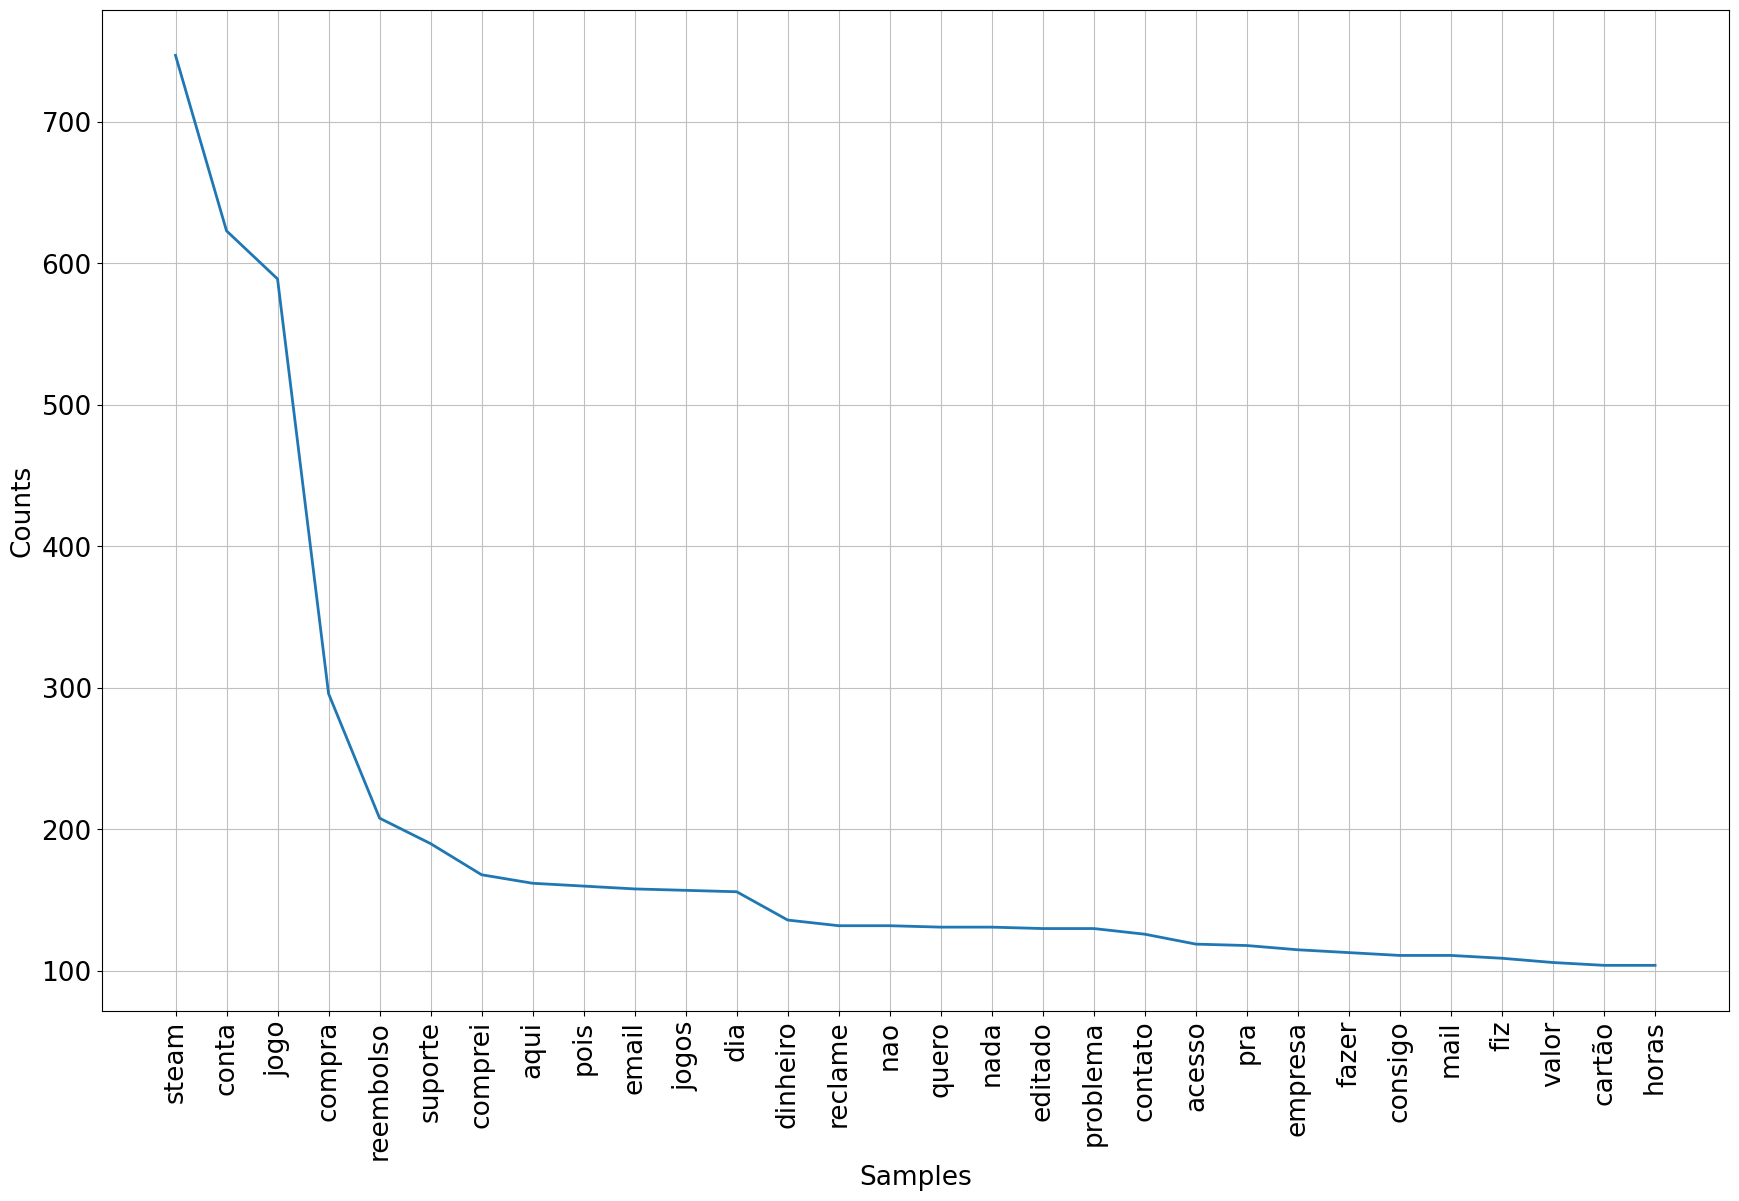

In [15]:
plt.figure(figsize=(21, 13))
plt.tight_layout()
freq.plot(30);

In [16]:
bigrams = nltk.bigrams(tokens)
big_freq = FreqDist(bigrams)

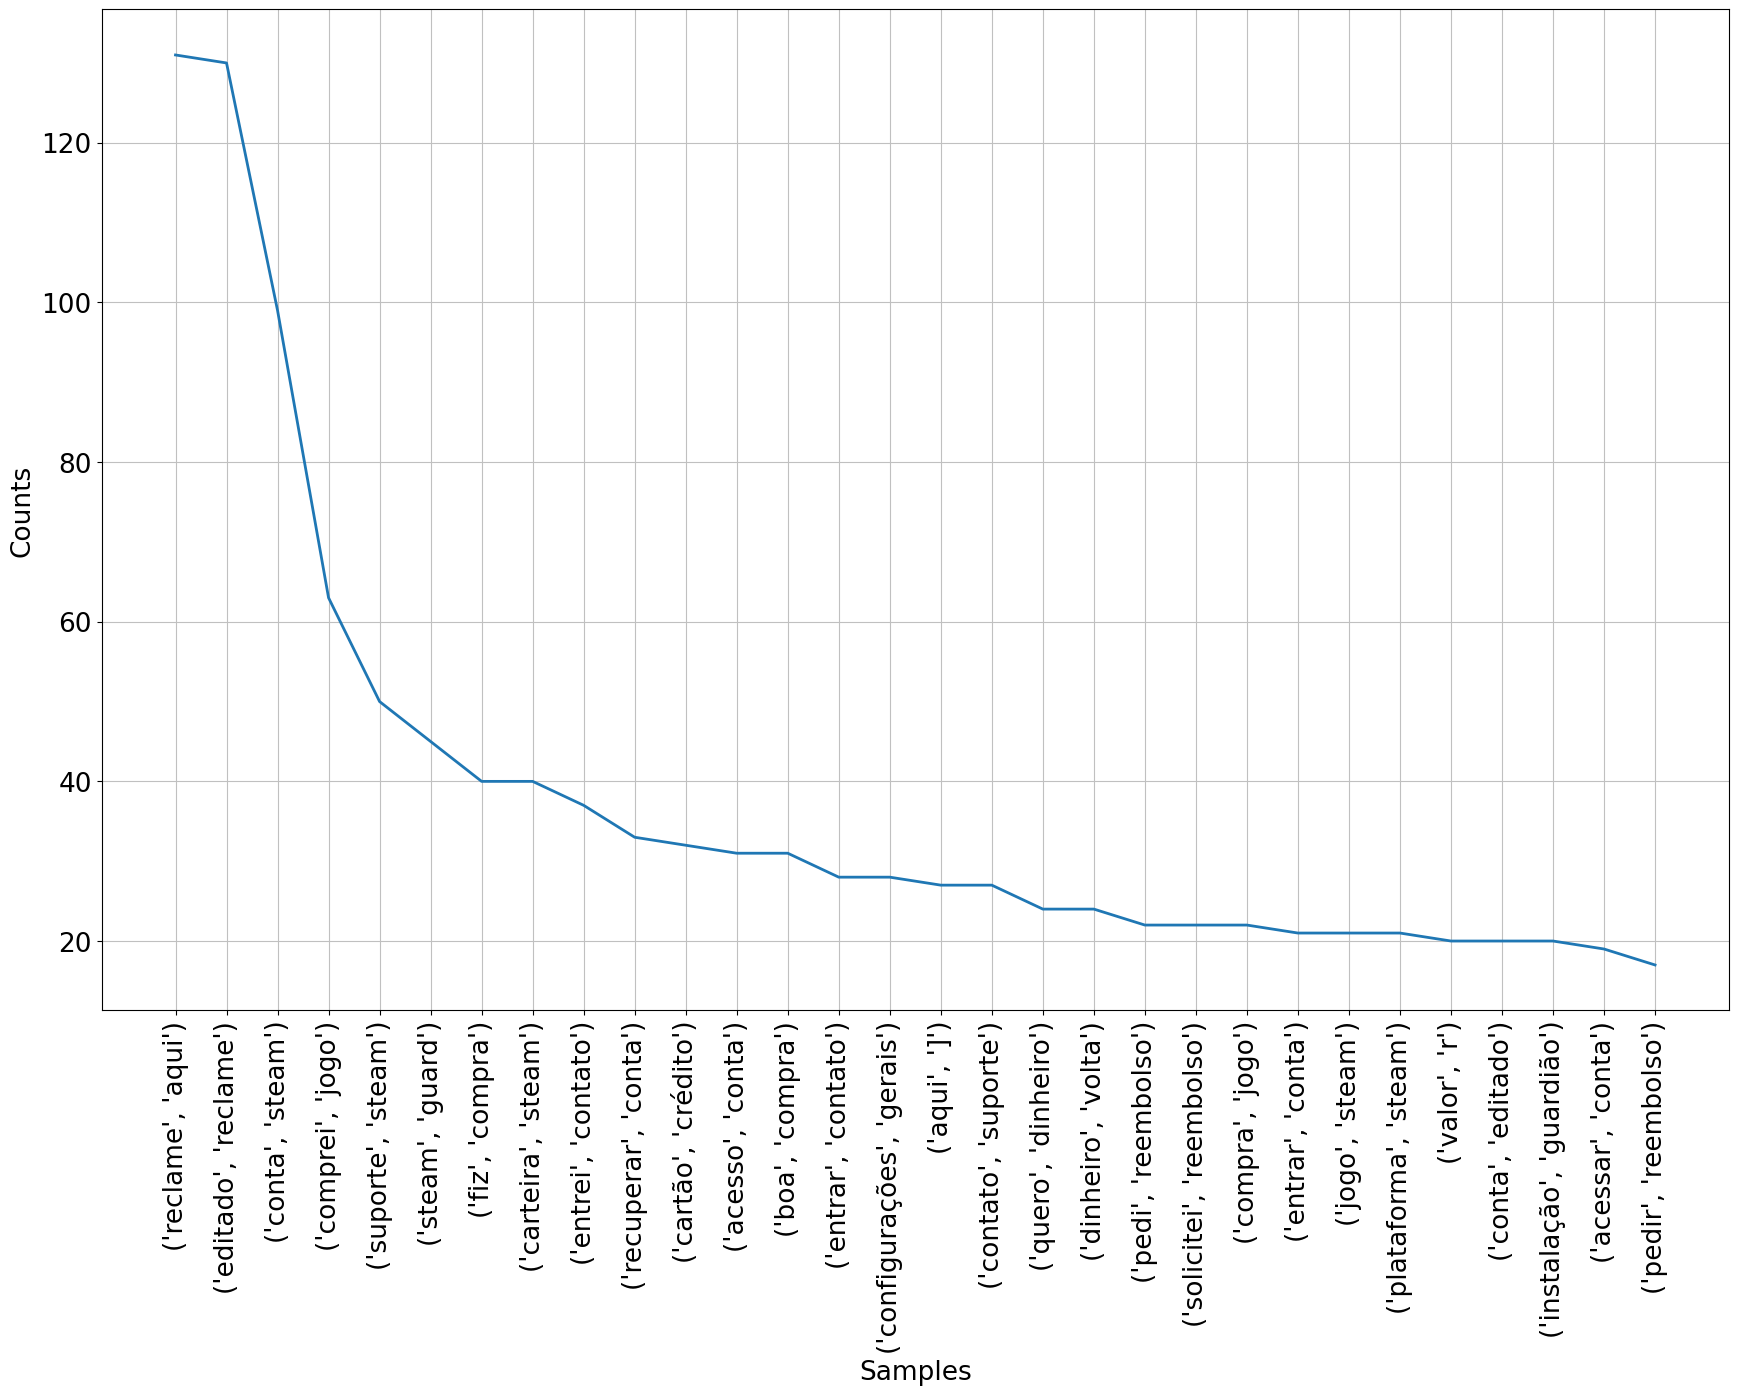

In [17]:
plt.figure(figsize=(21, 13))
plt.tight_layout()
big_freq.plot(30);